<a href="https://colab.research.google.com/github/venu72561-chinnam/AI-ML-project/blob/main/open_source_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy

In [ ]:
import spacy

In [ ]:
from spacy import displacy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import re

In [ ]:
from collections import Counter

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
texts = [
    "Apple is looking at buying U.K. startup for $1 billion.",
    "Barack Obama served as the 44th President of the United States.",
    "Elon Musk founded SpaceX in 2002.",
    "Google and Microsoft are competing in the field of Artificial Intelligence.",
    "Amazon headquarters are located in Seattle.",
    "Facebook rebranded to Meta in 2021.",
    "In 2020, COVID-19 pandemic affected businesses worldwide."
]

In [ ]:
all_entities = []

for text in texts:
    doc = nlp(text)
    for ent in doc.ents:
        all_entities.append({
            "Text": text,
            "Entity": ent.text,
            "Label": ent.label_,
            "Start_Char": ent.start_char,
            "End_Char": ent.end_char
        })
        print(f"Entity: {ent.text:15} | Label: {ent.label_:10} | Start: {ent.start_char} | End: {ent.end_char}")

Entity: Apple           | Label: ORG        | Start: 0 | End: 5
Entity: U.K.            | Label: GPE        | Start: 27 | End: 31
Entity: $1 billion      | Label: MONEY      | Start: 44 | End: 54
Entity: Barack Obama    | Label: PERSON     | Start: 0 | End: 12
Entity: 44th            | Label: ORDINAL    | Start: 27 | End: 31
Entity: the United States | Label: GPE        | Start: 45 | End: 62
Entity: Elon Musk       | Label: PERSON     | Start: 0 | End: 9
Entity: 2002            | Label: DATE       | Start: 28 | End: 32
Entity: Google          | Label: ORG        | Start: 0 | End: 6
Entity: Microsoft       | Label: ORG        | Start: 11 | End: 20
Entity: Artificial Intelligence | Label: ORG        | Start: 51 | End: 74
Entity: Amazon          | Label: ORG        | Start: 0 | End: 6
Entity: Seattle         | Label: GPE        | Start: 35 | End: 42
Entity: Meta            | Label: ORG        | Start: 22 | End: 26
Entity: 2021            | Label: DATE       | Start: 30 | End: 34
Entity: 2

In [ ]:
df_entities = pd.DataFrame(all_entities)
print("\nEntities DataFrame:")
print(df_entities)


Entities DataFrame:
                                                 Text  \
0   Apple is looking at buying U.K. startup for $1...   
1   Apple is looking at buying U.K. startup for $1...   
2   Apple is looking at buying U.K. startup for $1...   
3   Barack Obama served as the 44th President of t...   
4   Barack Obama served as the 44th President of t...   
5   Barack Obama served as the 44th President of t...   
6                   Elon Musk founded SpaceX in 2002.   
7                   Elon Musk founded SpaceX in 2002.   
8   Google and Microsoft are competing in the fiel...   
9   Google and Microsoft are competing in the fiel...   
10  Google and Microsoft are competing in the fiel...   
11        Amazon headquarters are located in Seattle.   
12        Amazon headquarters are located in Seattle.   
13                Facebook rebranded to Meta in 2021.   
14                Facebook rebranded to Meta in 2021.   
15  In 2020, COVID-19 pandemic affected businesses...   

         

In [ ]:
grouped = df_entities.groupby("Label")["Entity"].apply(list).to_dict()
for label, ents in grouped.items():
    print(f"{label}: {ents}")

DATE: ['2002', '2021', '2020']
GPE: ['U.K.', 'the United States', 'Seattle']
MONEY: ['$1 billion']
ORDINAL: ['44th']
ORG: ['Apple', 'Google', 'Microsoft', 'Artificial Intelligence', 'Amazon', 'Meta']
PERSON: ['Barack Obama', 'Elon Musk']


In [ ]:
for text in texts:
    doc = nlp(text)
    for sent in doc.sents:
        print(f"\nSentence: {sent.text}")
        for ent in sent.ents:
            print(f" - {ent.text:15} | {ent.label_}")


Sentence: Apple is looking at buying U.K. startup for $1 billion.
 - Apple           | ORG
 - U.K.            | GPE
 - $1 billion      | MONEY

Sentence: Barack Obama served as the 44th President of the United States.
 - Barack Obama    | PERSON
 - 44th            | ORDINAL
 - the United States | GPE

Sentence: Elon Musk founded SpaceX in 2002.
 - Elon Musk       | PERSON
 - 2002            | DATE

Sentence: Google and Microsoft are competing in the field of Artificial Intelligence.
 - Google          | ORG
 - Microsoft       | ORG
 - Artificial Intelligence | ORG

Sentence: Amazon headquarters are located in Seattle.
 - Amazon          | ORG
 - Seattle         | GPE

Sentence: Facebook rebranded to Meta in 2021.
 - Meta            | ORG
 - 2021            | DATE

Sentence: In 2020, COVID-19 pandemic affected businesses worldwide.
 - 2020            | DATE


Counter({'ORG': 6, 'GPE': 3, 'DATE': 3, 'PERSON': 2, 'MONEY': 1, 'ORDINAL': 1})


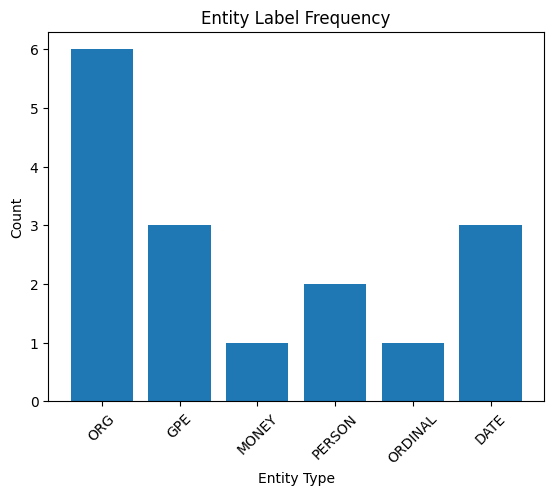

In [ ]:
label_counts = Counter(df_entities["Label"])
print(label_counts)

plt.bar(label_counts.keys(), label_counts.values())
plt.title("Entity Label Frequency")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
doc = nlp(texts[0])
displacy.render(doc, style="ent", jupyter=True)

In [ ]:
pattern = r"\b\d{4}\b"  # regex for years
for text in texts:
    years = re.findall(pattern, text)
    doc = nlp(text)
    print(f"\nText: {text}")
    if years:
        print("Regex Years Found:", years)
    for ent in doc.ents:
        print(f"NER: {ent.text:15} | Label: {ent.label_}")


Text: Apple is looking at buying U.K. startup for $1 billion.
NER: Apple           | Label: ORG
NER: U.K.            | Label: GPE
NER: $1 billion      | Label: MONEY

Text: Barack Obama served as the 44th President of the United States.
NER: Barack Obama    | Label: PERSON
NER: 44th            | Label: ORDINAL
NER: the United States | Label: GPE

Text: Elon Musk founded SpaceX in 2002.
Regex Years Found: ['2002']
NER: Elon Musk       | Label: PERSON
NER: 2002            | Label: DATE

Text: Google and Microsoft are competing in the field of Artificial Intelligence.
NER: Google          | Label: ORG
NER: Microsoft       | Label: ORG
NER: Artificial Intelligence | Label: ORG

Text: Amazon headquarters are located in Seattle.
NER: Amazon          | Label: ORG
NER: Seattle         | Label: GPE

Text: Facebook rebranded to Meta in 2021.
Regex Years Found: ['2021']
NER: Meta            | Label: ORG
NER: 2021            | Label: DATE

Text: In 2020, COVID-19 pandemic affected businesses worl